In [1]:
import random
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
OUTPUT_IMAGES_LOCATION = Path("output_images") / "attack_convergence"
if not OUTPUT_IMAGES_LOCATION.exists():
    OUTPUT_IMAGES_LOCATION.mkdir(parents=True)

In [3]:
sns.set_theme(style="darkgrid")
mpl.rcParams['text.usetex'] = True

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize": (3.14, 3.14 / 1.6),
            "legend.fontsize": 12,
            "legend.title_fontsize": 14},
        font_scale=1.5)

In [4]:
random.seed(42)

In [5]:
def read_file(filename):
    return pd.read_csv(filename).rename(columns={"loss": "Loss", "steps": "Attack steps"})

def plot_random_point(filename):
    results = read_file(filename)
    random_index = random.choice(results["point"])
    single_point_df = results[results["point"] == random_index].drop(["point"], axis=1)
    sns.lineplot(data=single_point_df, x="Attack steps", y="Loss", hue="seed", legend=False)
    pdf_filename = f"{Path(filename).stem}-point.pdf"
    plt.savefig(OUTPUT_IMAGES_LOCATION / pdf_filename, bbox_inches="tight")
    

def plot_all_points(filename):
    results = read_file(filename)
    g = sns.FacetGrid(
        results,
        col="point",
        hue="seed",
        col_wrap=4,
        height=4,
        sharey=False
    )
    g.map(sns.lineplot, "Attack steps", "Loss", ci=None)
    pdf_filename = f"{Path(filename).stem}-all.pdf"
    plt.savefig(OUTPUT_IMAGES_LOCATION / pdf_filename, bbox_inches="tight")

## XCiT

### Final model results

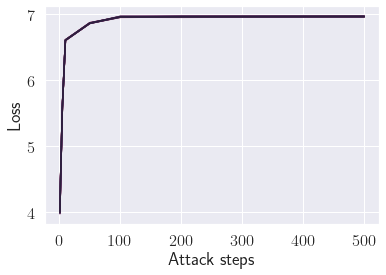

In [6]:
plot_random_point("data/attack_convergence/xcit-robust-99.csv")

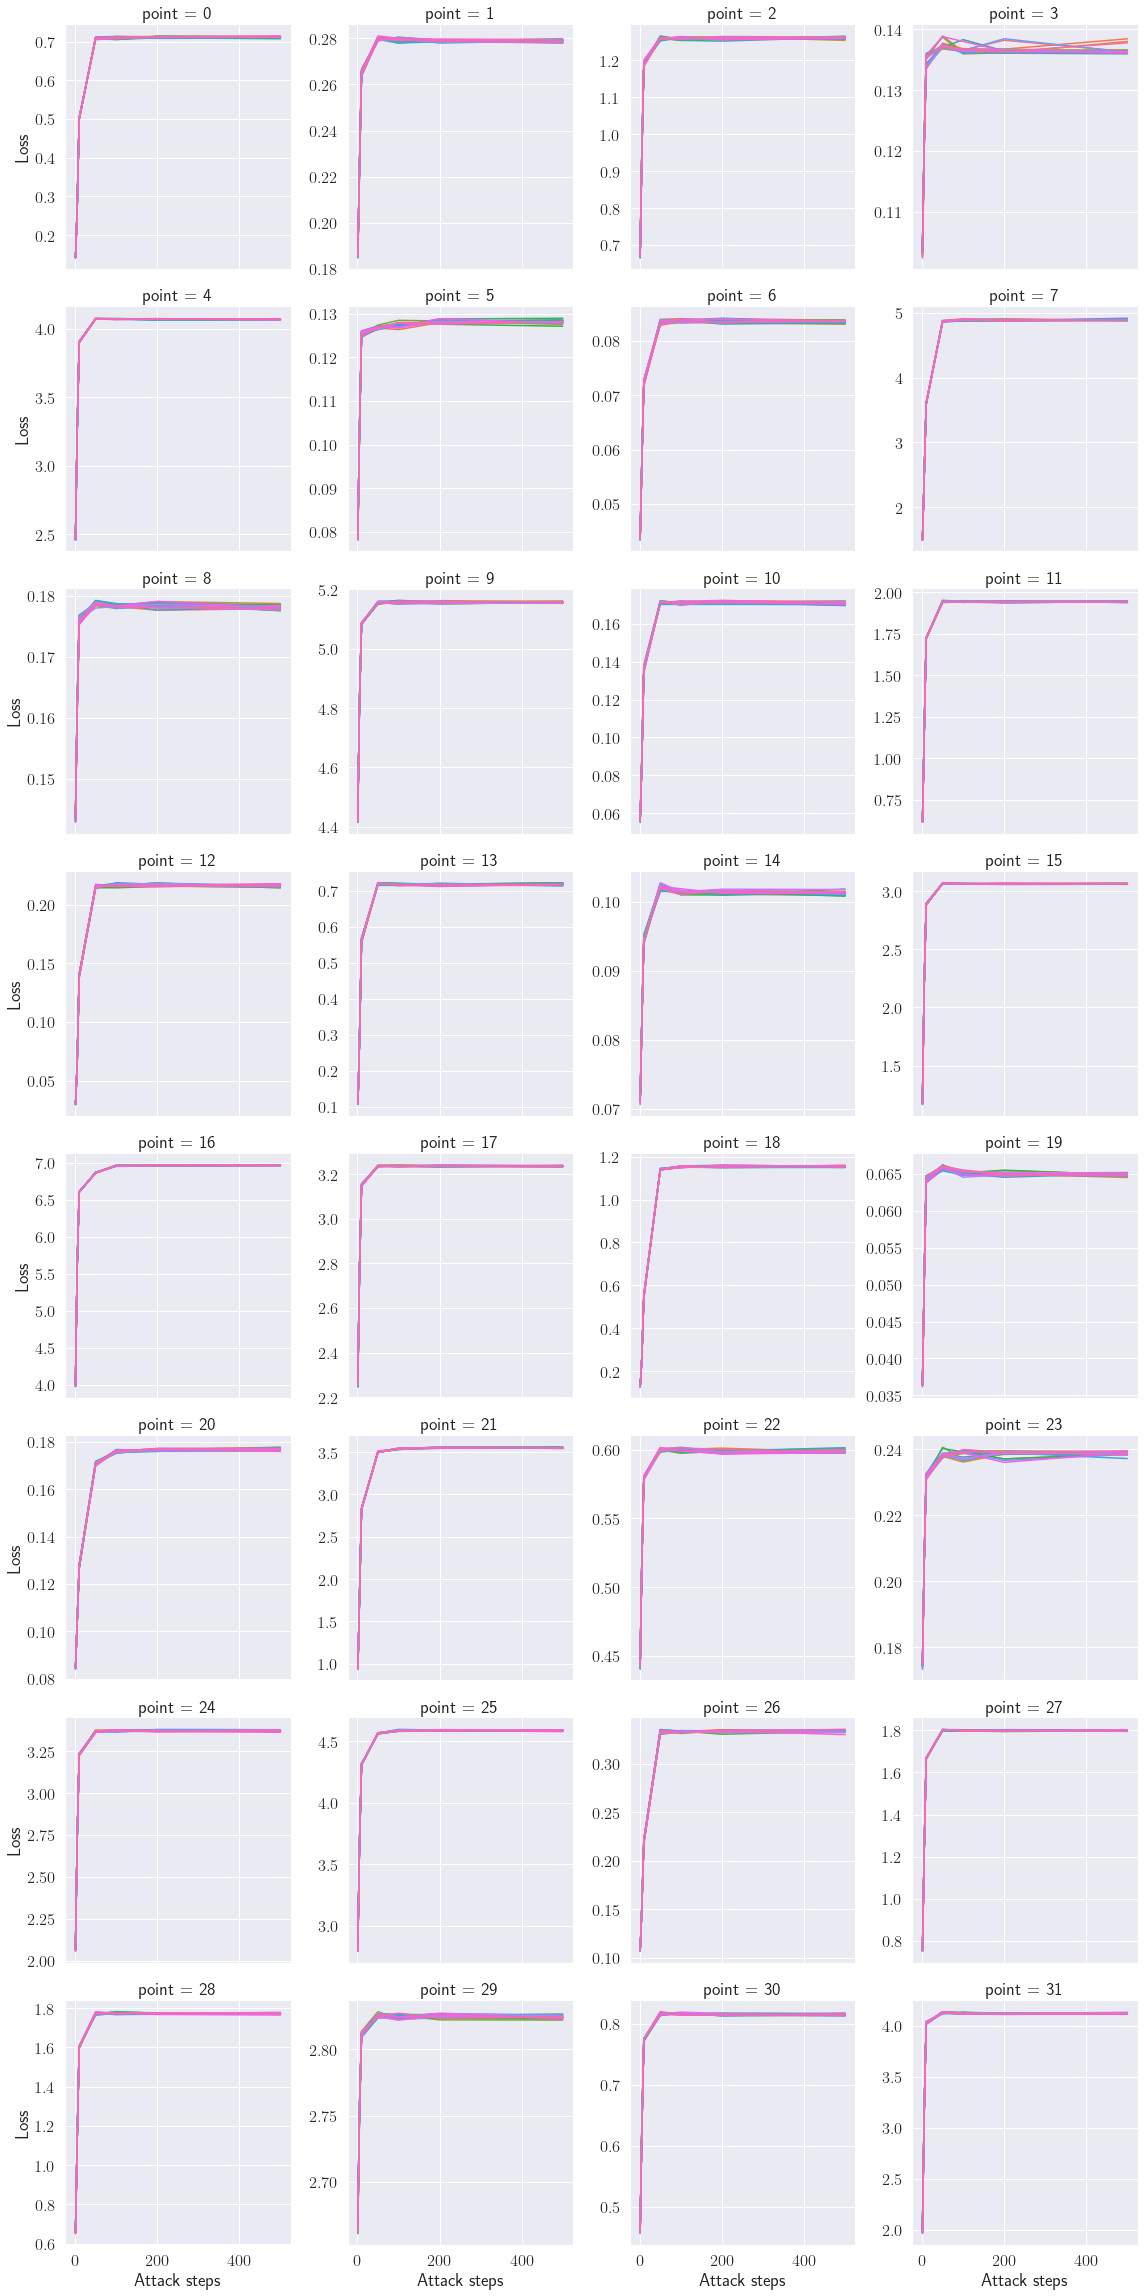

In [7]:
plot_all_points("data/attack_convergence/xcit-robust-99.csv")

### Mid-training results

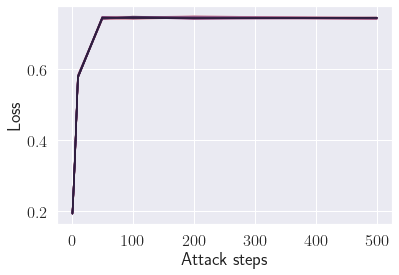

In [8]:
plot_random_point("data/attack_convergence/xcit-robust-49.csv")

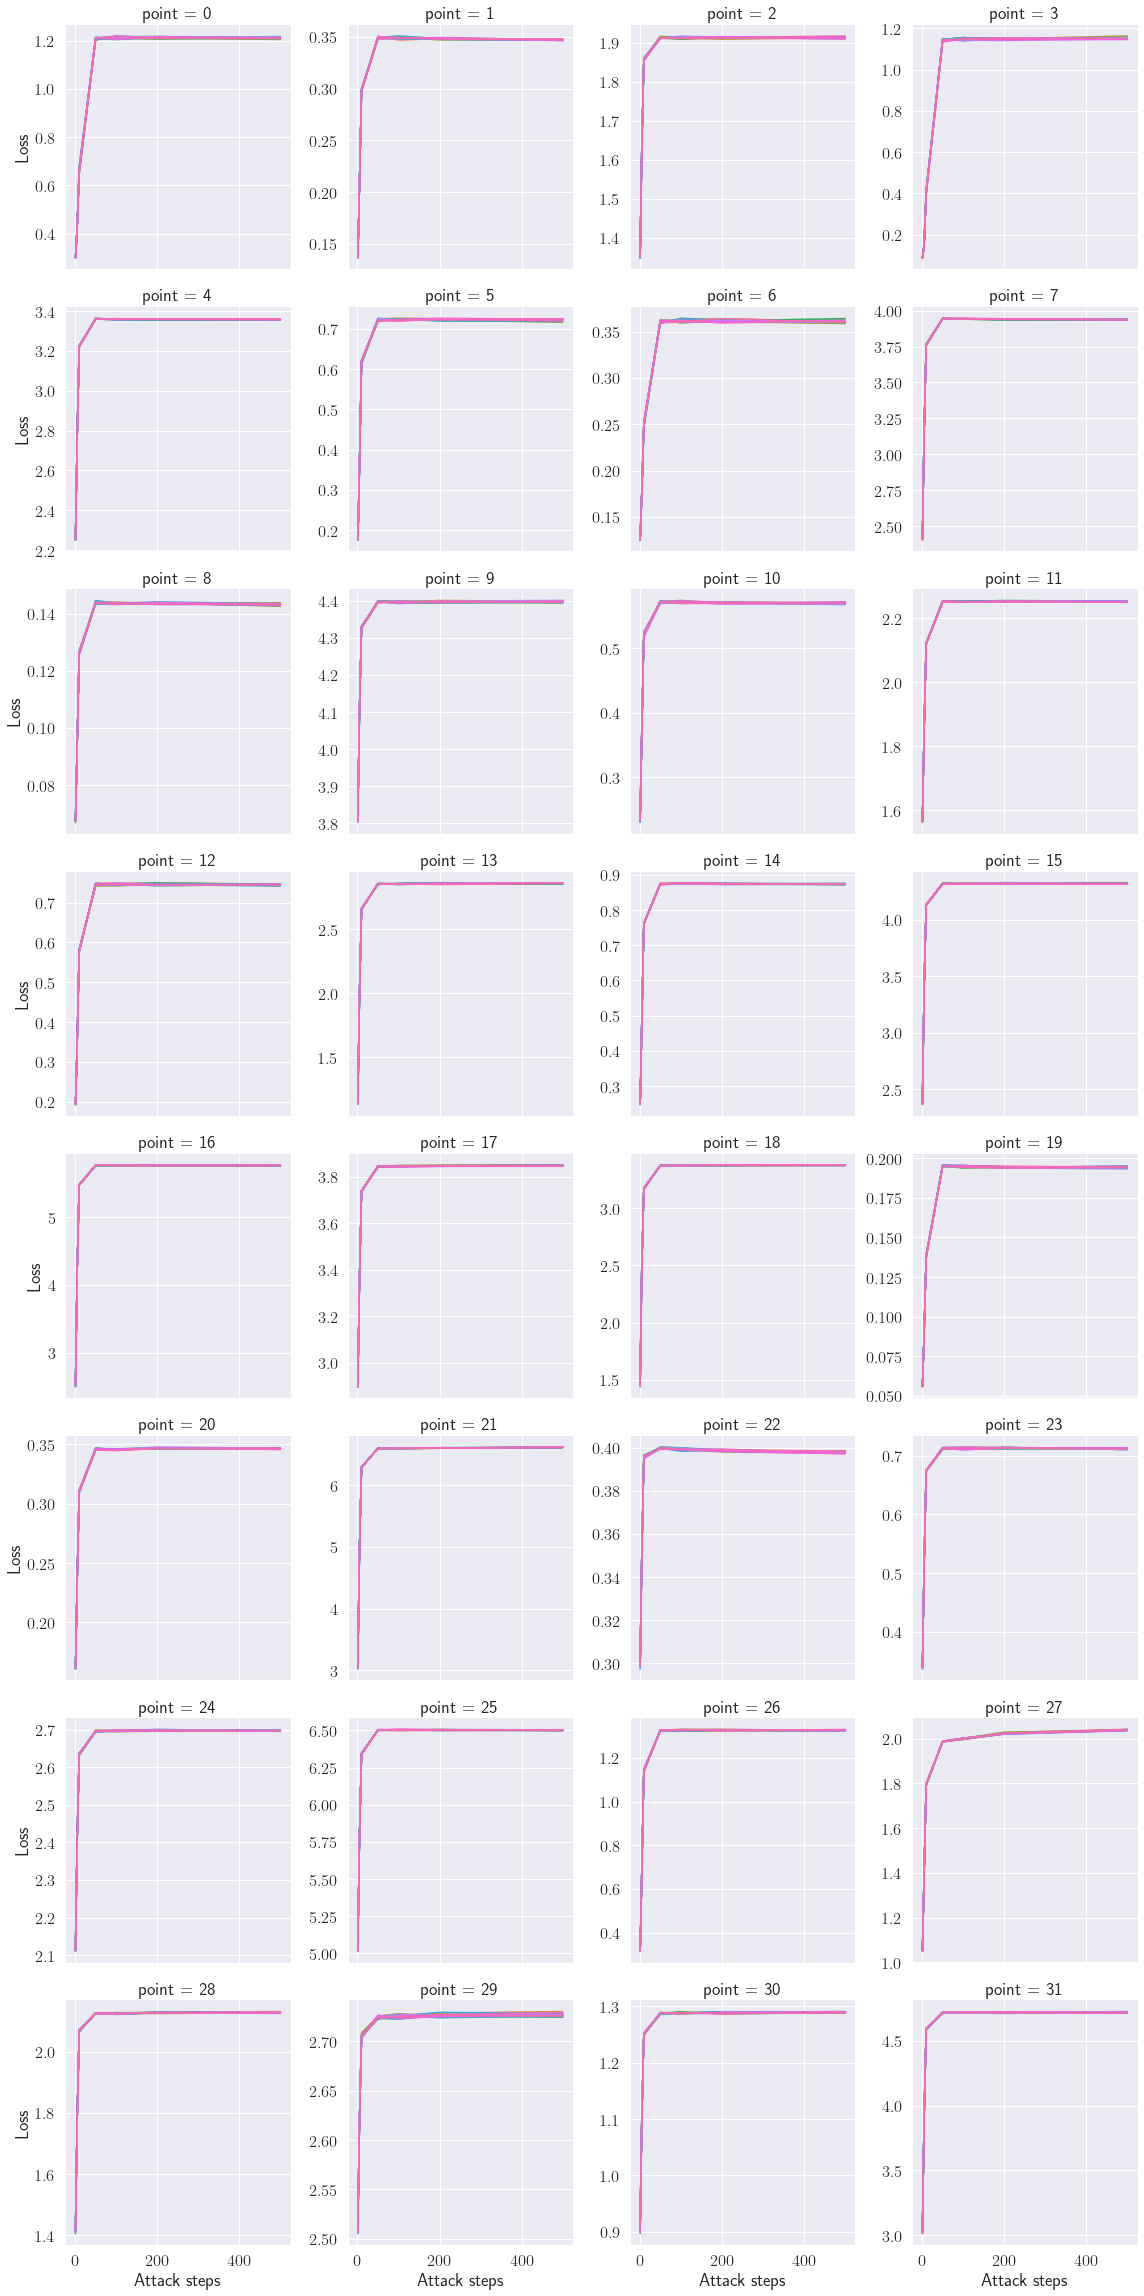

In [9]:
plot_all_points("data/attack_convergence/xcit-robust-49.csv")

### Start of training results

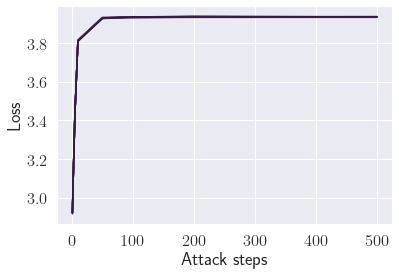

In [14]:
plot_random_point("data/attack_convergence/xcit-robust-9.csv")

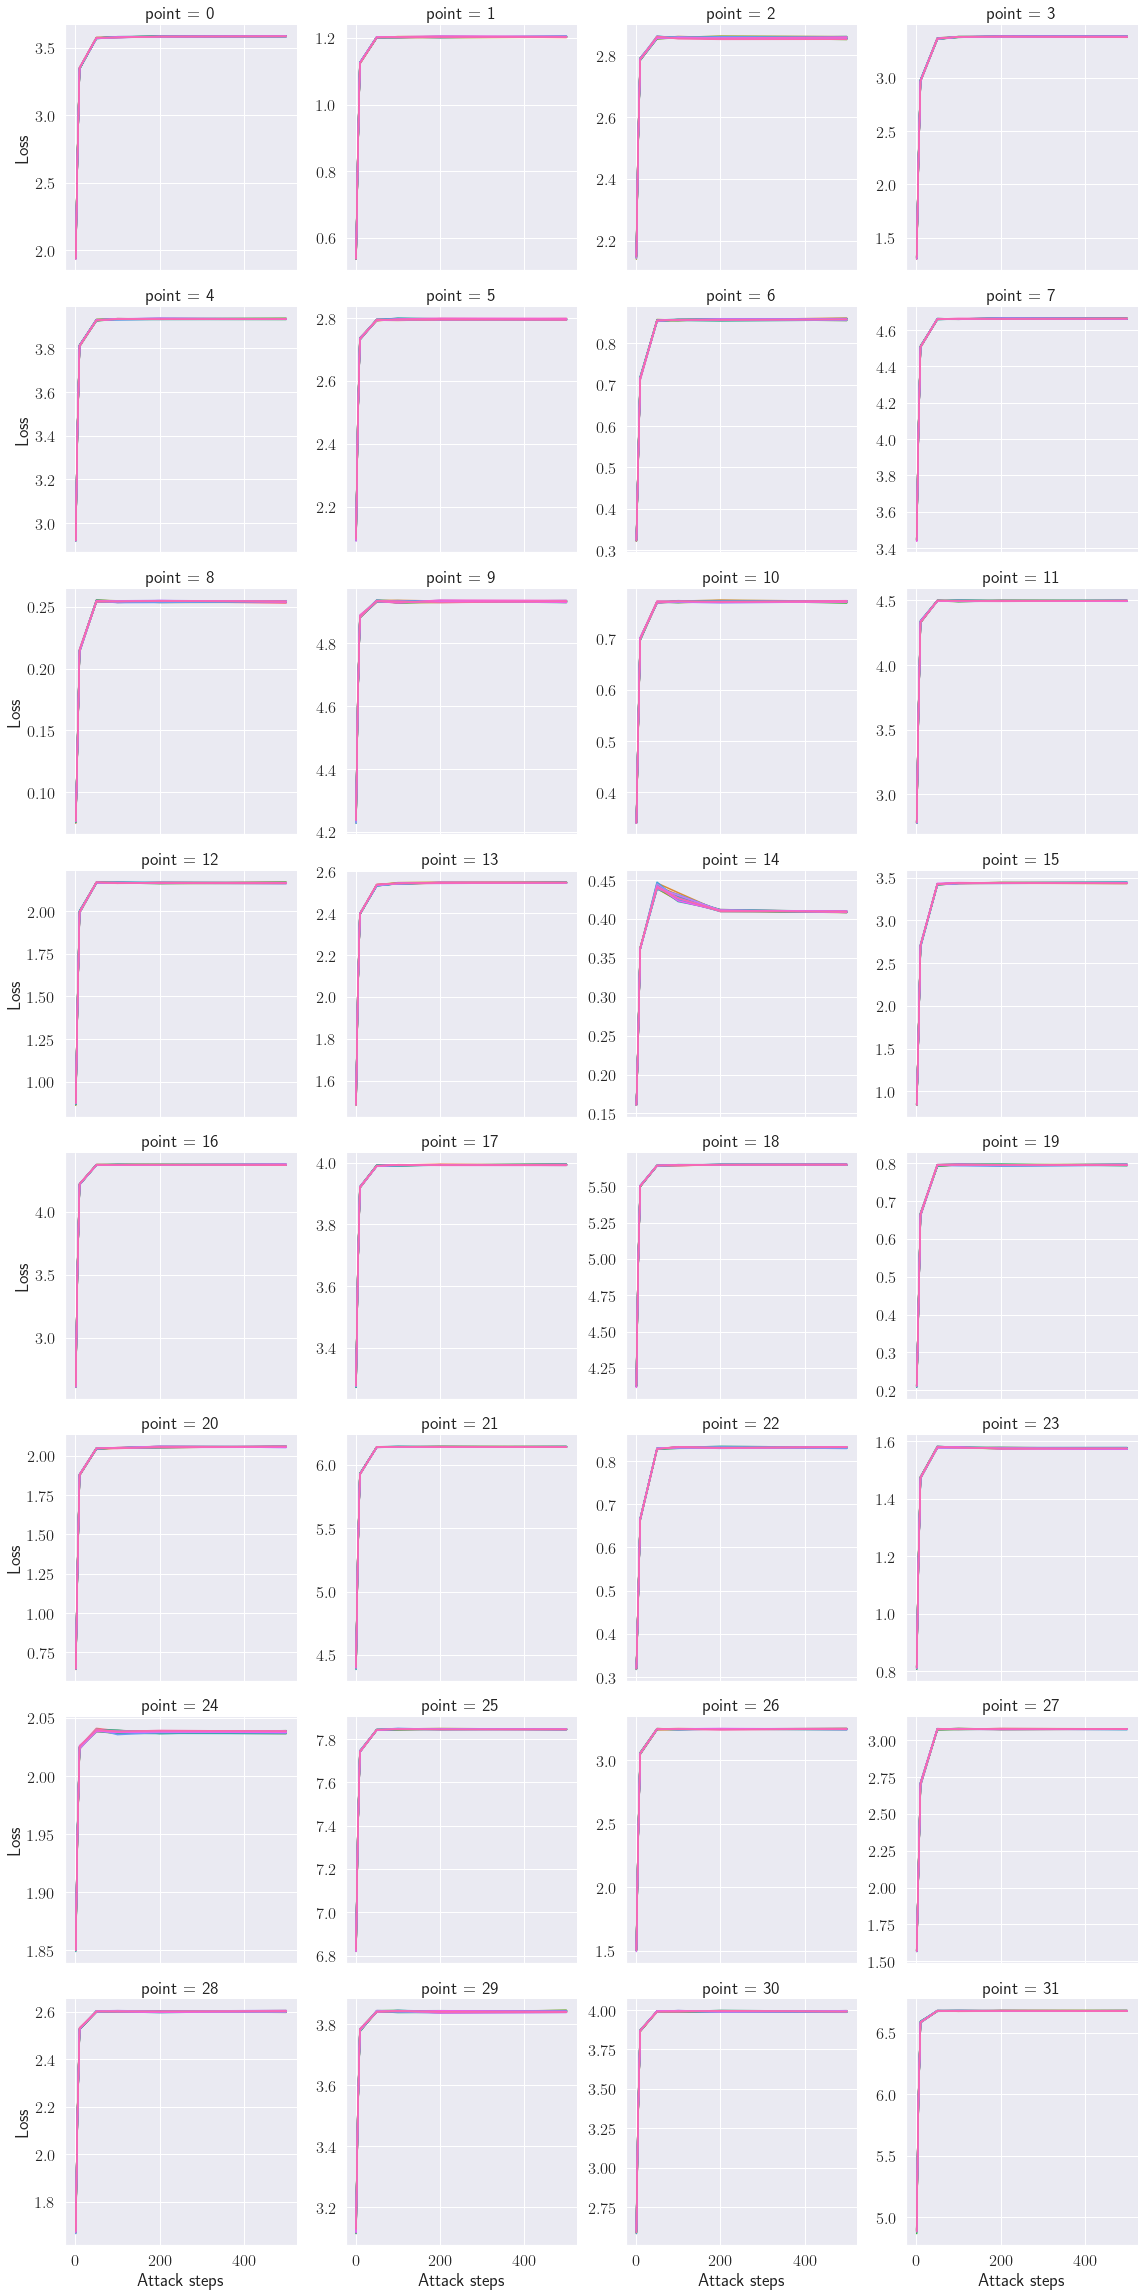

In [15]:
plot_all_points("data/attack_convergence/xcit-robust-9.csv")

## ResNet

### Final model results

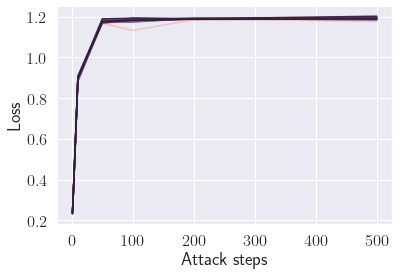

In [10]:
plot_random_point("data/attack_convergence/resnet-robust-99.csv")

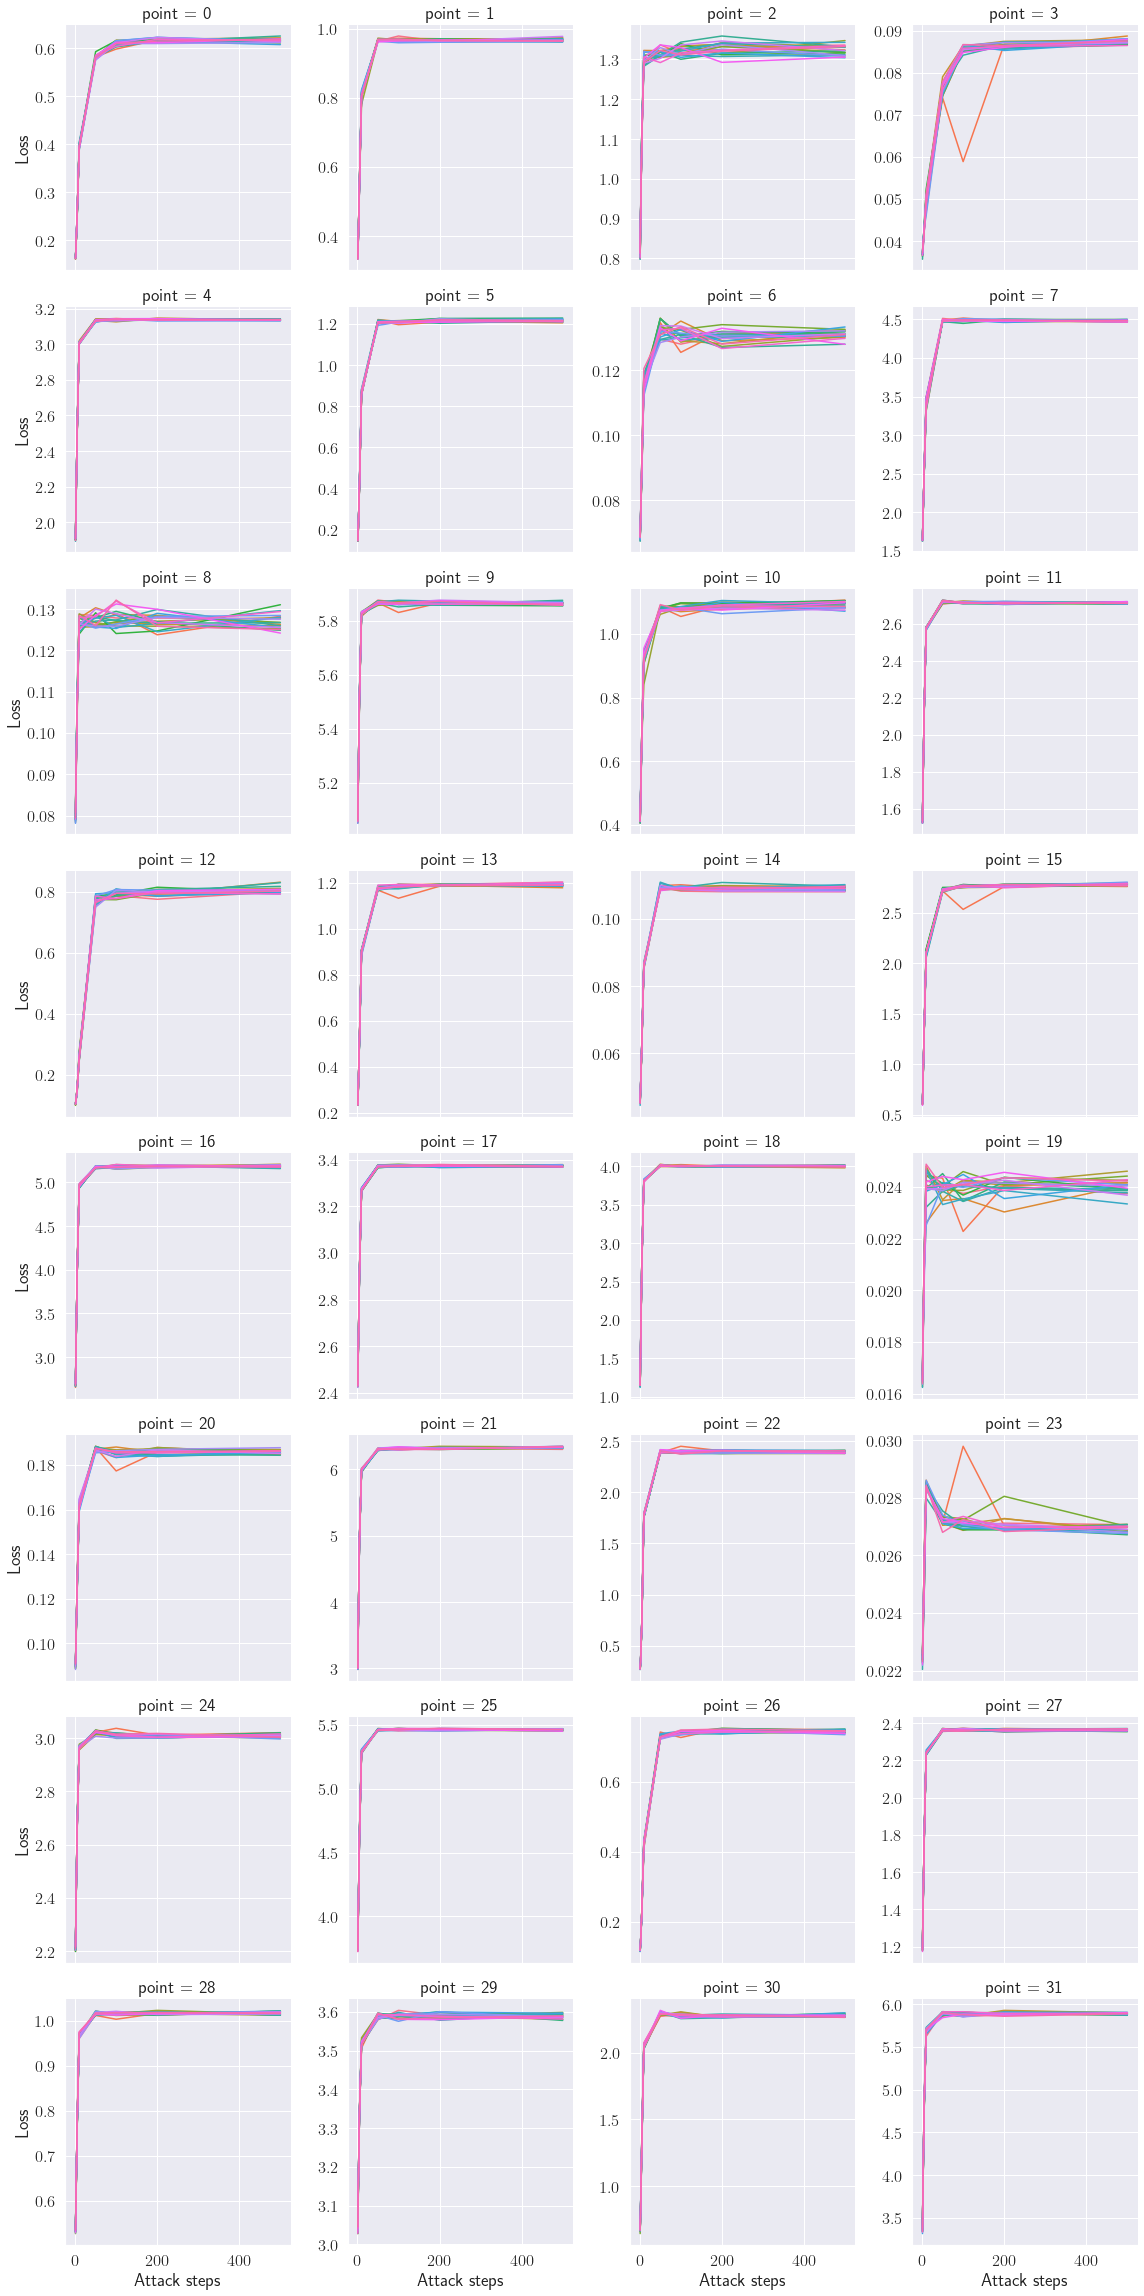

In [11]:
plot_all_points("data/attack_convergence/resnet-robust-99.csv")

### Mid-training results

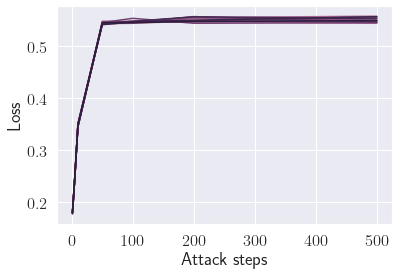

In [12]:
plot_random_point("data/attack_convergence/resnet-robust-49.csv")

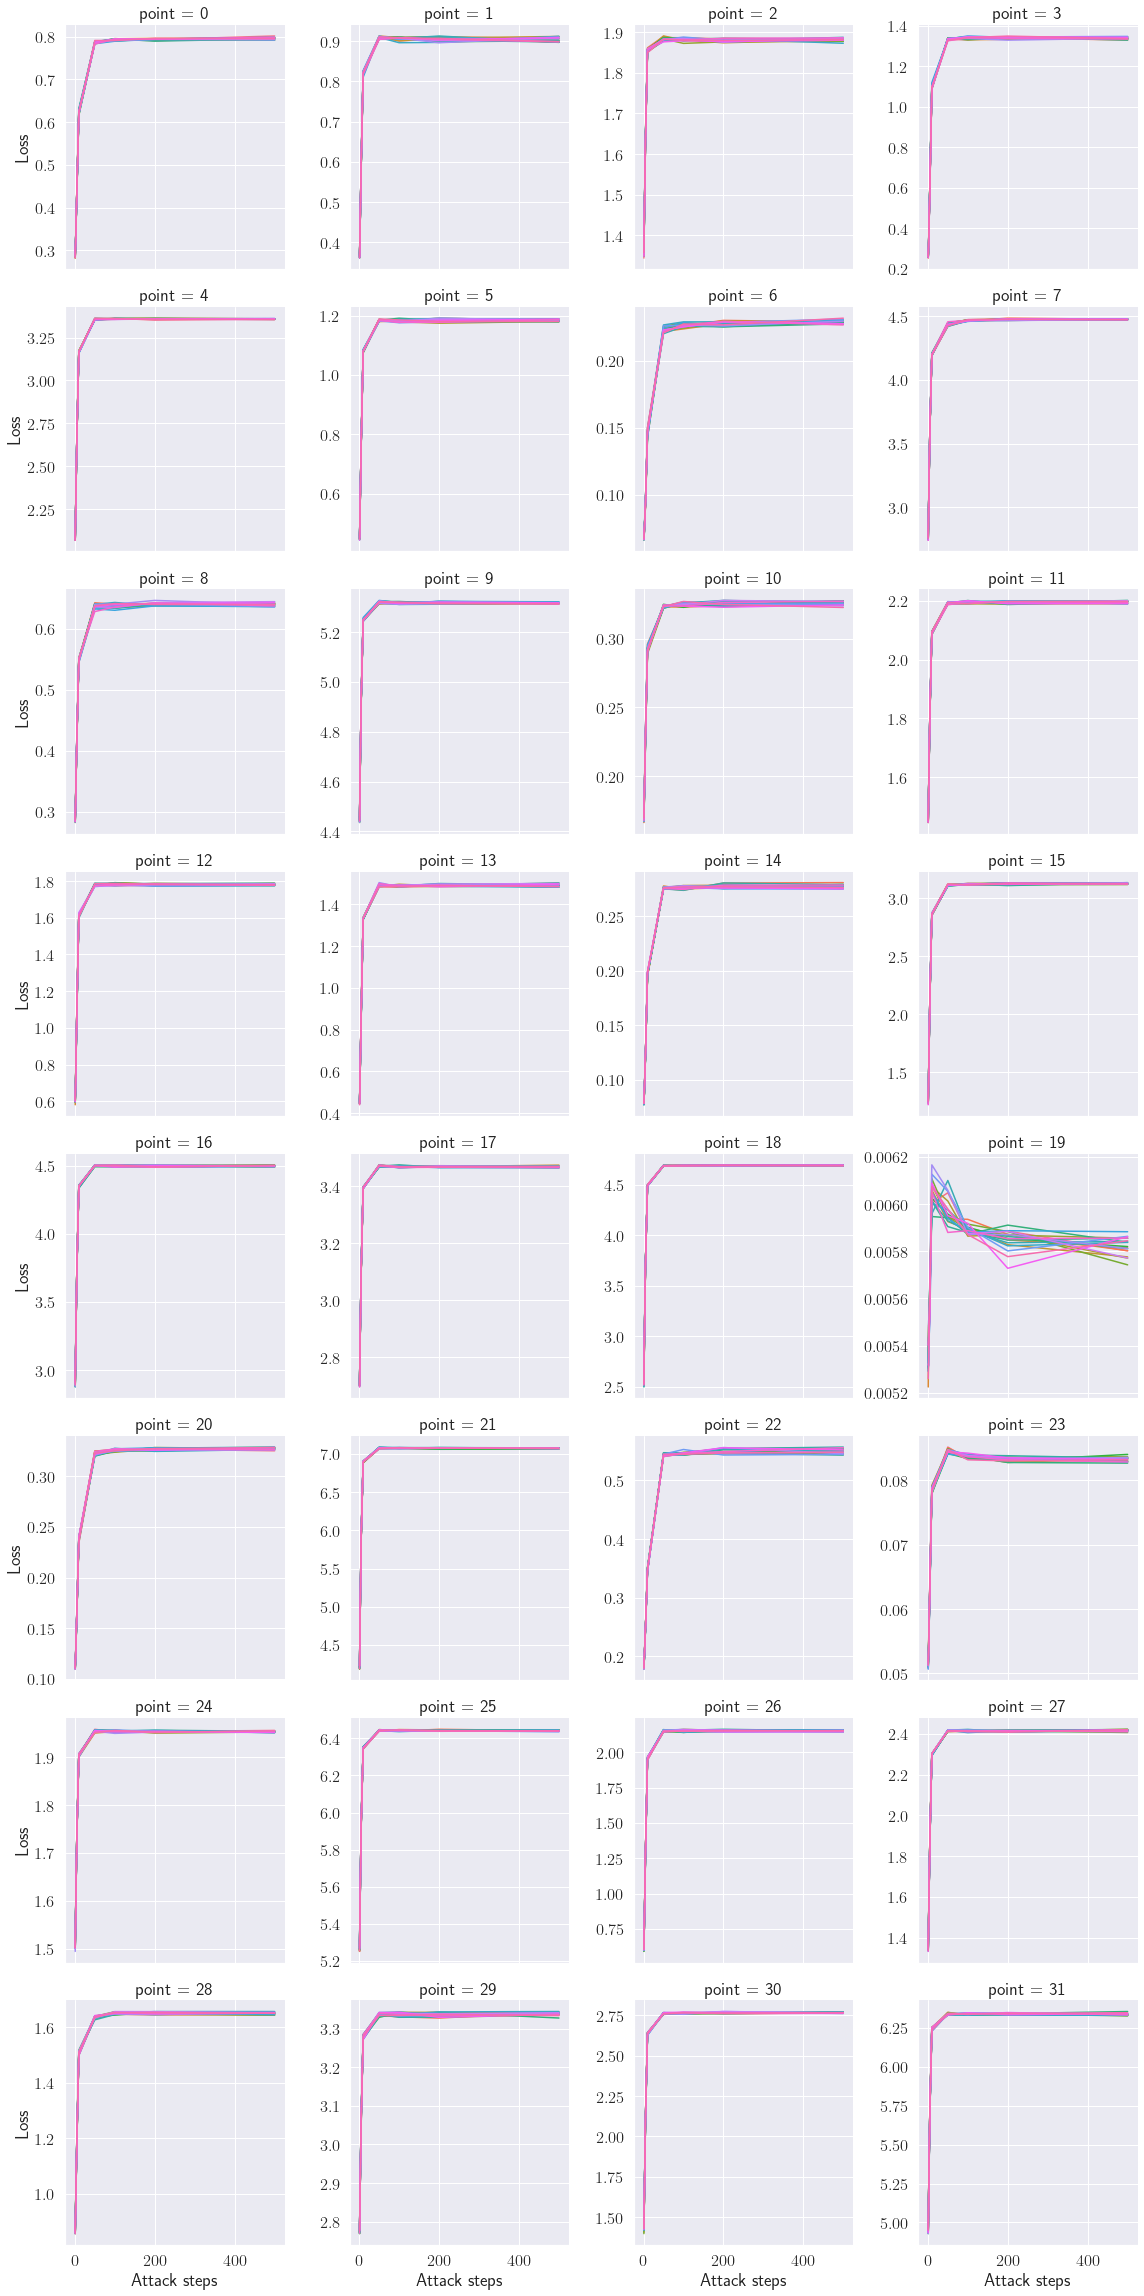

In [13]:
plot_all_points("data/attack_convergence/resnet-robust-49.csv")

### Beginning of training results

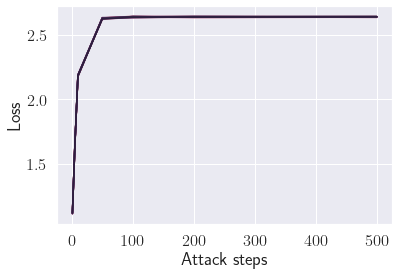

In [16]:
plot_random_point("data/attack_convergence/resnet-robust-9.csv")

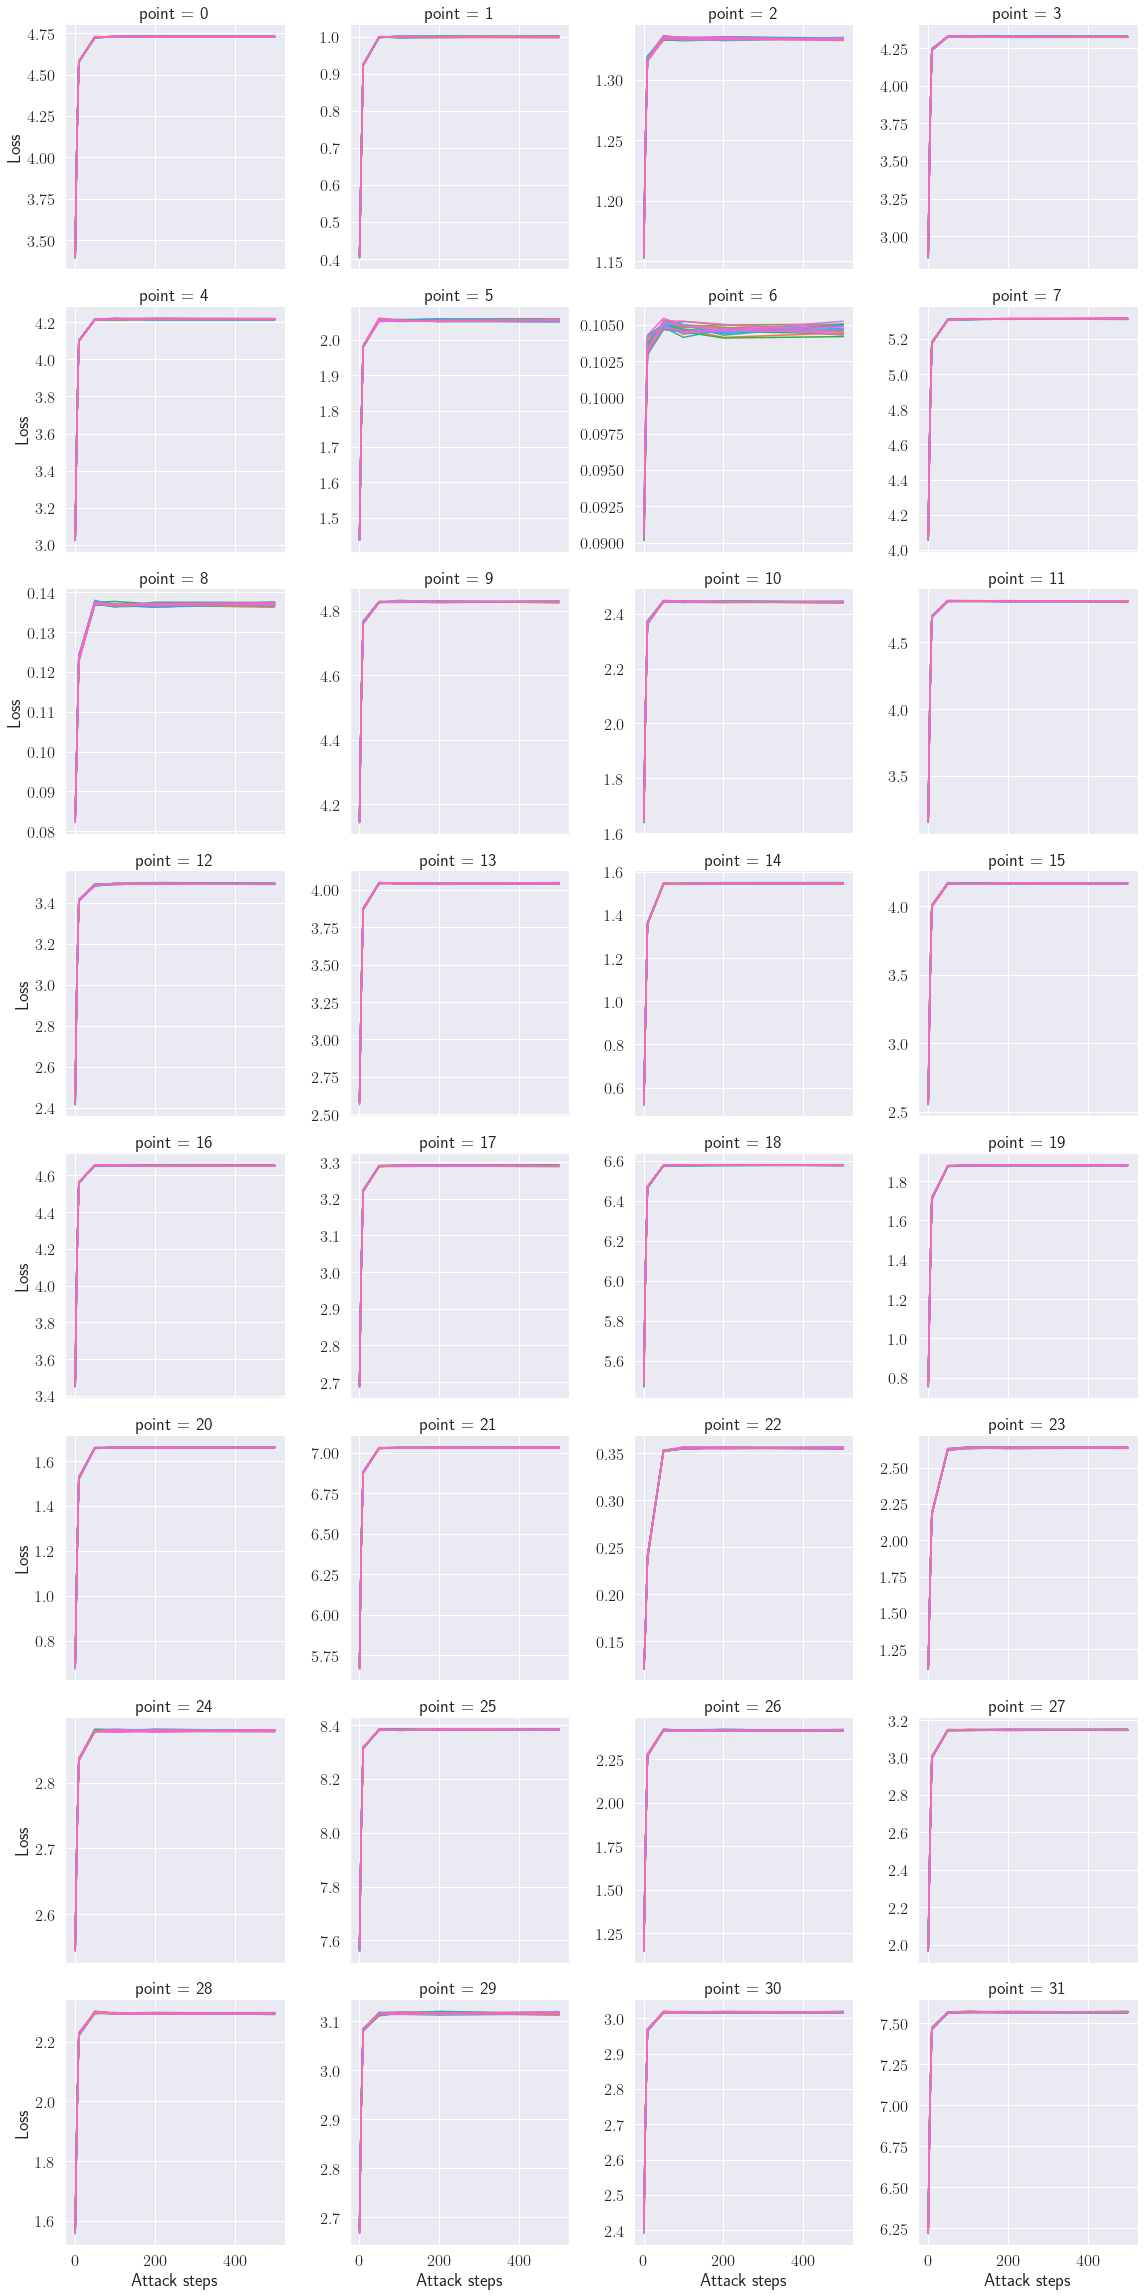

In [17]:
plot_all_points("data/attack_convergence/resnet-robust-9.csv")